# Nhận diện ký hiệu ngón tay từ 5 -> 9 CNN

- >**<h4>Mô tả</h4>**
    + Bộ dữ liệu chứa 4773 hình ảnh đã được dán nhãn sẵn về 5 ký hiệu tay từ 5 đến 9
    + Ảnh có tỷ lệ và bối cảnh khác nhau.
- >**<h4>Input: Ảnh ngón tay </h4>**
- >**<h4>Output: Số ký hiệu từ 5 -> 9</h4>**

## NỘI DUNG ::

[ **1 ) Import thư viện**](#content1)

[ **2 ) Chuẩn bị dữ liệu**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Đánh giá Hiệu suất Mô hình**](#content4)

[ **5 ) Visualize dự đoán**](#content5)

<a id="content1"></a>
## 1 ) Import thư viện.

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="content2"></a>
## 2 ) Chuẩn bị dữ liệu

## 2.1) Lấy train và validation

In [ ]:
X=[]
Z=[]
IMG_SIZE=224
Nam='/content/drive/MyDrive/Data/5'
Sau='/content/drive/MyDrive/Data/6'
Bay='/content/drive/MyDrive/Data/7'
Tam='/content/drive/MyDrive/Data/8'
Chin='/content/drive/MyDrive/Data/9'

In [ ]:
def nhan(img,kieuso):
    return kieuso 

In [ ]:
def make_train_data(kieuso,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = nhan(img,kieuso )
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))      

In [ ]:
make_train_data('5',Nam)
print(len(X))

100%|██████████| 885/885 [01:01<00:00, 14.37it/s] 

885


In [ ]:
make_train_data('6',Sau)
print(len(X))

100%|██████████| 1076/1076 [01:52<00:00,  9.60it/s]

1961


In [ ]:
make_train_data('7',Bay)
print(len(X))

100%|██████████| 855/855 [01:05<00:00, 13.13it/s]


2816


In [ ]:
make_train_data('8',Tam)
print(len(X))

100%|██████████| 967/967 [01:02<00:00, 15.49it/s] 

3783


In [ ]:
make_train_data('9',Chin)
print(len(X))

100%|██████████| 990/990 [01:26<00:00, 11.39it/s]

4773


+ Nhìn vào biểu đồ trên, ta có thể thấy các nhãn có số lượng không đồng đều,số 6 chiếm tỉ lệ % nhiều nhất

## 2.2 ) Visualizing một số hình ảnh ngẫu nhiên

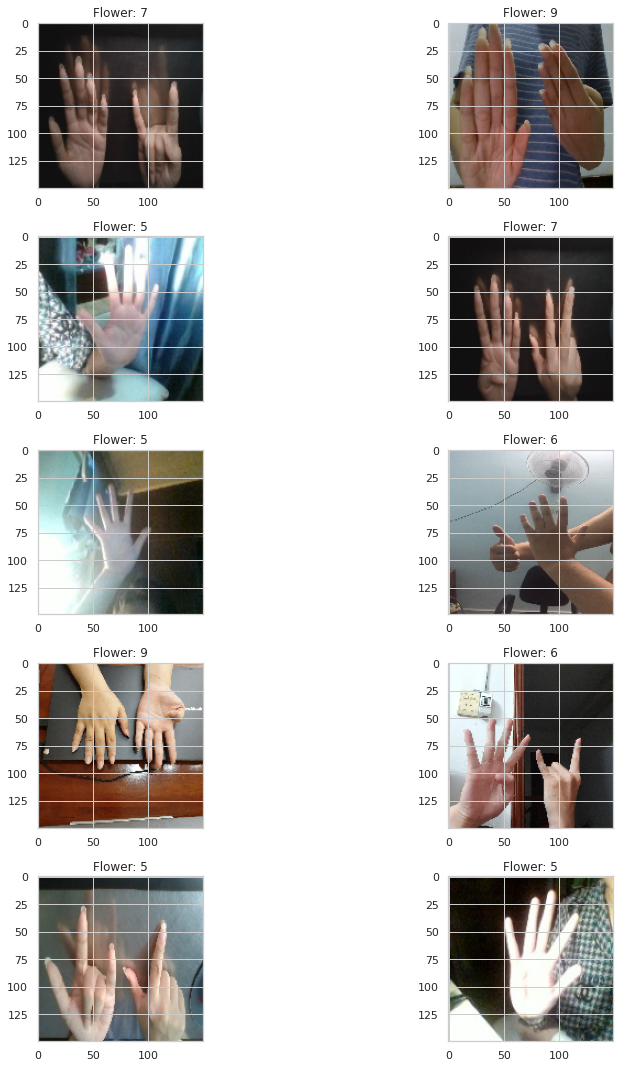

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])        
plt.tight_layout()      

## 2.3 ) Label Encoding & One Hot Encoding

In [ ]:
le=LabelEncoder()

Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## 2.4 ) Chia Train/Validation

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print("Shape of train images is:", x_train.shape)
print("Shape of validation images is:", x_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (3341, 150, 150, 3)
Shape of validation images is: (1432, 150, 150, 3)
Shape of labels is: (3341, 5)
Shape of labels is: (1432, 5)


In [ ]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", Y.shape)

Shape of train images is: (4773, 150, 150, 3)
Shape of labels is: (4773, 5)


## 2.5 ) Đặt Random Seeds

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Xây dựng mạng

In [2]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

 

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Sử dụng LR Annealer
 + Giảm tỷ lệ học tập khi một chỉ số không được cải thiện.

Các mô hình thường được hưởng lợi từ việc giảm tỷ lệ học tập xuống 2-10 một khi việc học tập bị đình trệ. Lệnh gọi lại này giám sát một số lượng và nếu không thấy sự cải thiện nào đối với số kỷ nguyên 'patience' , thì tỷ lệ học tập sẽ giảm

In [3]:
batch_size=32
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Tăng cường dữ liệu để ngăn chặn Overfitting

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  # xoay 
        zoom_range = 0.1, # Thu phóng 
        horizontal_flip=True) #Lật
datagen.fit(x_train)
x_train.shape

(3341, 150, 150, 3)

## 3.4 ) Compiling & Summary

In [4]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

In [ ]:
# save computational graph to json
graph = model.to_json()
with open("comp_graph.json", "w") as json_file:
    json_file.write(graph)

## 3.5 ) Fitting on the Training set

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.save_weights("model.h5")
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/100
104/104 [==============================] - 29s 182ms/step - loss: 1.1642 - accuracy: 0.6247 - precision: 0.6811 - recall: 0.5558 - val_loss: 25.8711 - val_accuracy: 0.2221 - val_precision: 0.2221 - val_recall: 0.2221
Epoch 2/100
104/104 [==============================] - 17s 160ms/step - loss: 0.6385 - accuracy: 0.7655 - precision: 0.8032 - recall: 0.7205 - val_loss: 19.1698 - val_accuracy: 0.2053 - val_precision: 0.2053 - val_recall: 0.2053
Epoch 3/100
104/104 [==============================] - 17s 160ms/step - loss: 0.5368 - accuracy: 0.8027 - precision: 0.8321 - recall: 0.7791 - val_loss: 7.1213 - val_accuracy: 0.3303 - val_precision: 0.3341 - val_recall: 0.3240
Epoch 4/100
104/104 [==============================] - 22s 213ms/step - loss: 0.4349 - accuracy: 0.8501 - precision: 0.8677 - recall: 0.8286 - val_loss: 2.6248 - val_accuracy: 0.4518 - val_precision: 0.4724 - val_recall: 0.4358
Epoch 5/100
104/104 [==============================] - 20s 194ms/step - loss: 0.3732 -

In [ ]:
History

In [ ]:
History.params

{'verbose': 1, 'epochs': 100, 'steps': 104}

In [ ]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

<a id="content4"></a>
## 4 ) Evaluating

In [ ]:
from keras.models import model_from_json

# load computational graph
json_file = open('comp_graph.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
pretrained_model = model_from_json(loaded_model_json)

# load weights into new model + compile
pretrained_model.load_weights("model.h5")
pretrained_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])


score = pretrained_model.evaluate(x_test, y_test, verbose=0)
print("Loss: {:6.2f},/n Precision: {:6.2f}%,/n Recall: {:6.2f}%/n ".format(score[0],score[1]*100, score[2]*100))

Loss:   0.04,/n Precision:  98.81%,/n Recall:  98.81%/n 


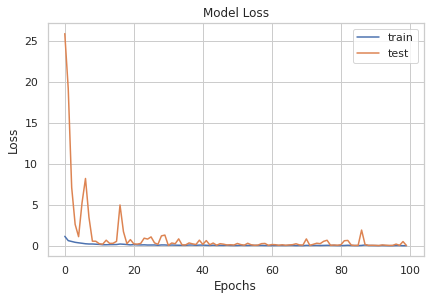

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

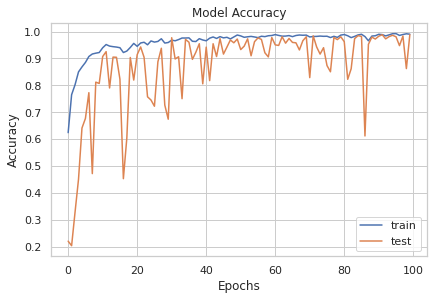

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


<a id="content5"></a>
## 5 ) Visualizing Predictons trên tập Validation

In [ ]:
# nhận dự đoán về bộ validation.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

45/45 [==============================] - 1s 12ms/step


In [ ]:
i=0
prop_class=[]   # True
mis_class=[]    # False

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#### Visualize một số hình ảnh được dự đoán đúng

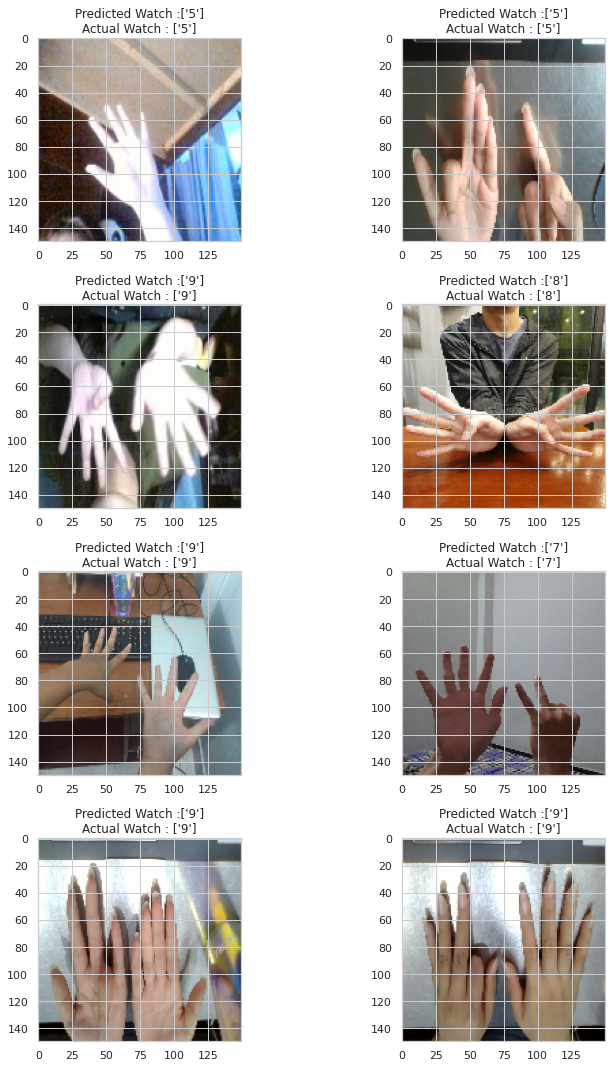

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Watch : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

#### Visualize một số hình ảnh dự đoán sai

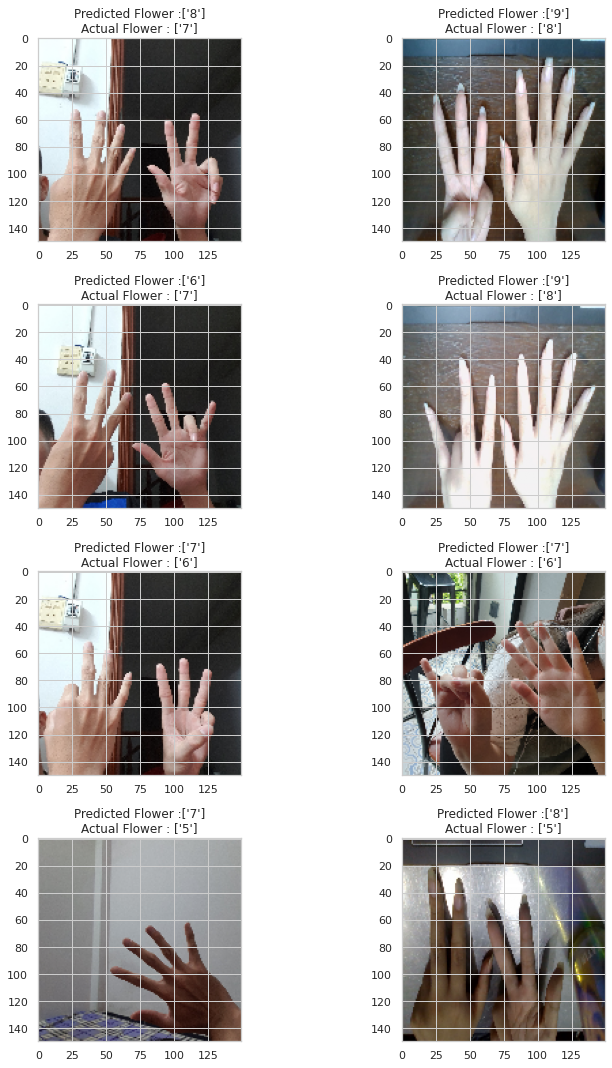

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

1/1 [==============================] - 0s 18ms/step


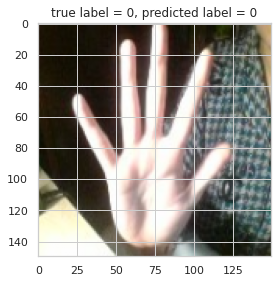

In [ ]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img, cmap='gray')
plt.title('true label = %d, predicted label = %d' % (test_label, pred_label))
plt.show()
#0-5; 1-6; 2-7; 3-8; 4-9

In [ ]:
model.save('modelCNN.h5')